In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv("D:\\Data science\\ToyotaCorolla.csv",encoding='latin1')
df.head()
df.shape

(1436, 38)

In [2]:
data=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [3]:
data.describe()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [4]:
data.info()
data[data.values==0.0]
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [5]:
data[data.duplicated()].shape
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [6]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [7]:
data


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


<Axes: >

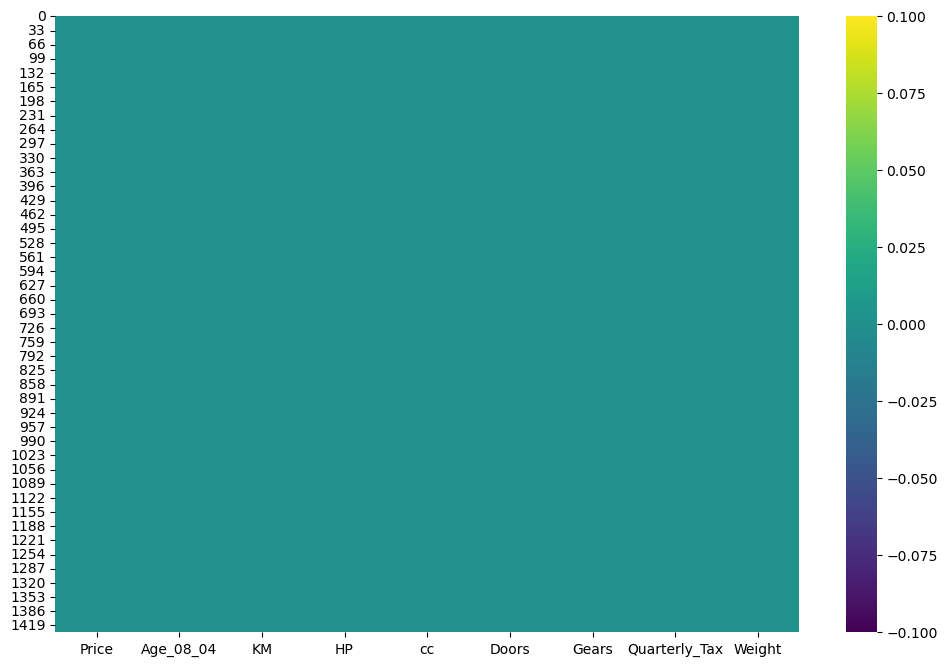

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')


In [9]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))


Discrete Variables Count: 5


In [10]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 4


In [11]:
import scipy.stats as stat
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    

Text(0.5, 1.0, 'Price')

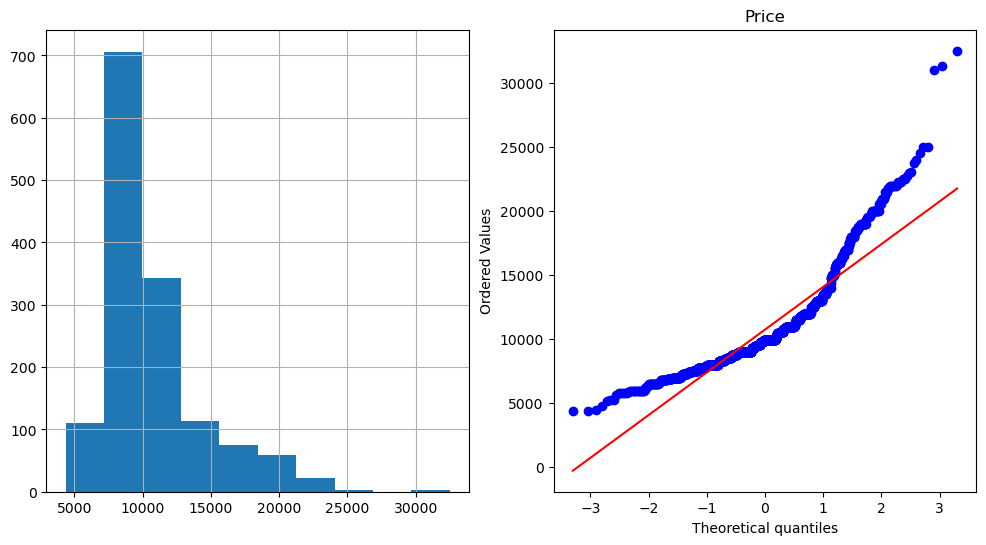

In [12]:
plot_data(data,'Price')
plt.title('Price')

Text(0.5, 1.0, 'Weight')

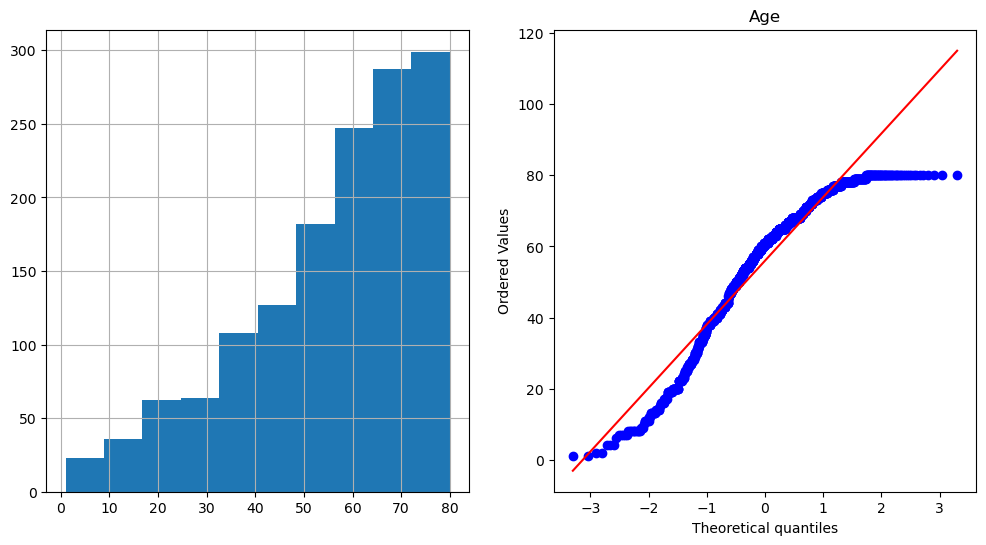

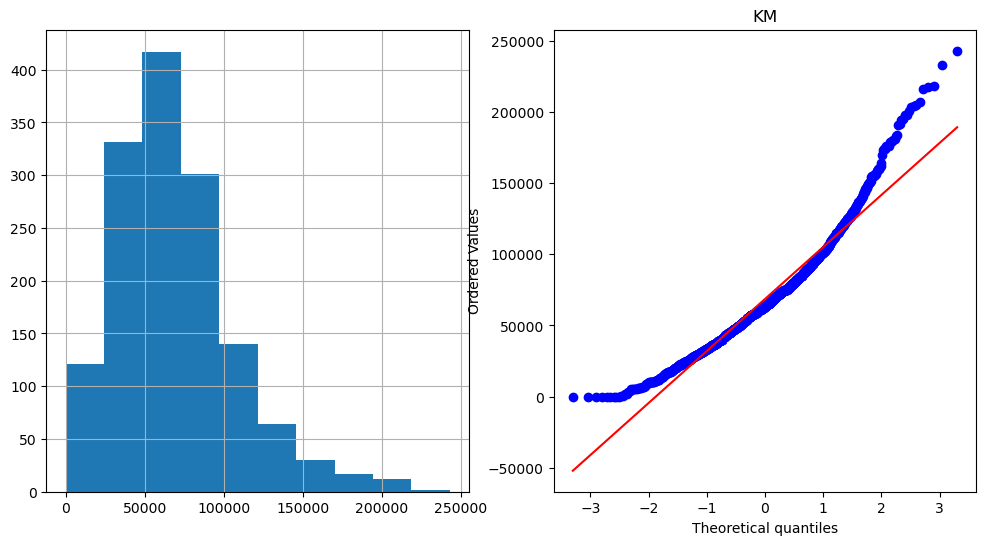

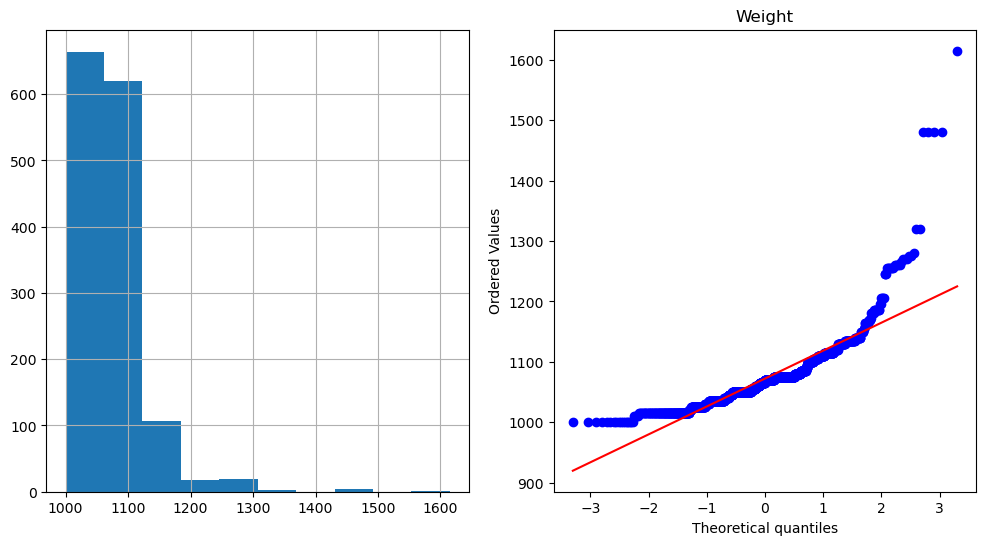

In [18]:
plot_data(data,'Age_08_04')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')


In [14]:
#log transformation
import numpy as np
dof=data.copy()
dof[continuous_feature]=np.log(dof[continuous_feature])

Text(0.5, 1.0, 'Weight')

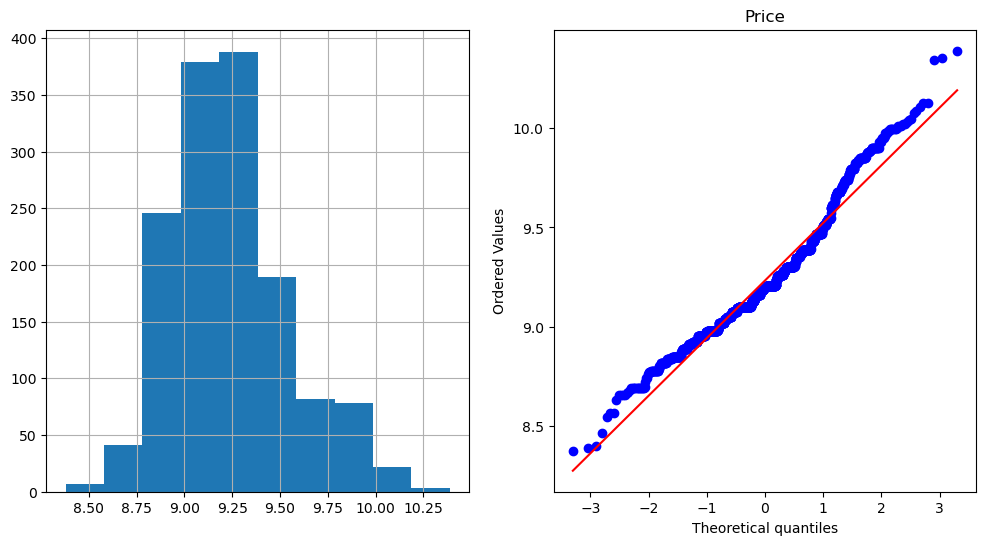

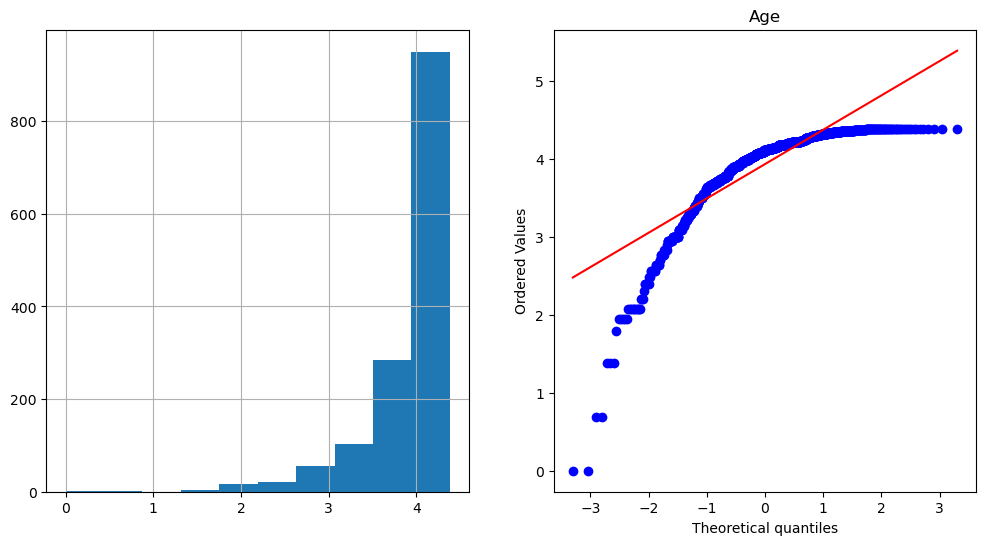

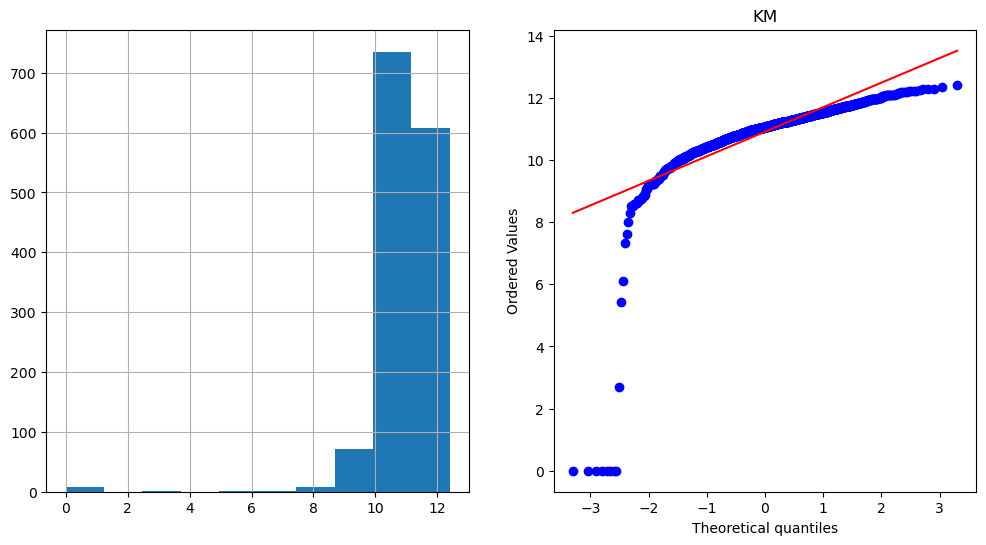

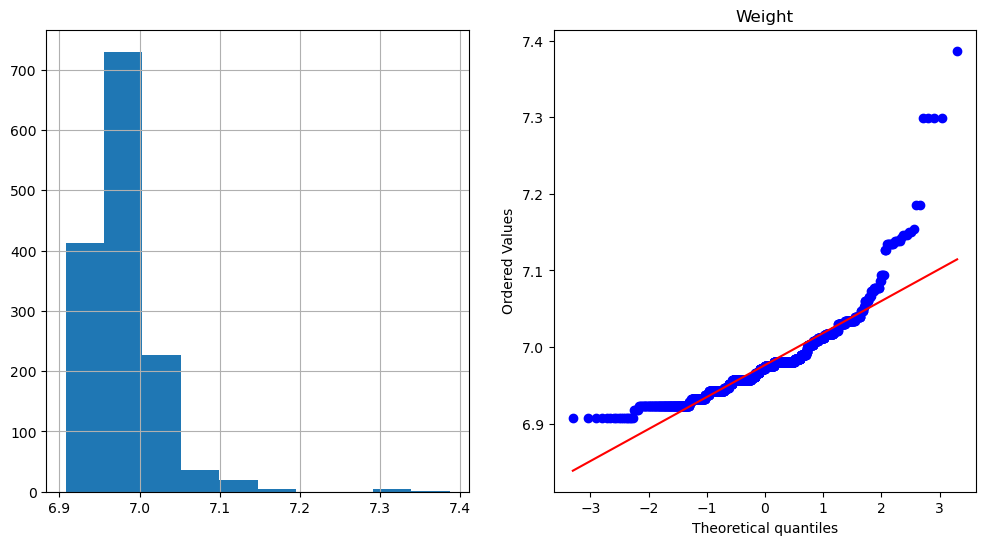

In [15]:
plot_data(dof,'Price')
plt.title('Price')
plot_data(dof,'Age_08_04')
plt.title('Age')
plot_data(dof,'KM')
plt.title('KM')
plot_data(dof,'Weight')
plt.title('Weight')

In [16]:
#square root transformation
dof=data.copy()
dof[continuous_feature]=np.sqrt(dof[continuous_feature])

Text(0.5, 1.0, 'Weight')

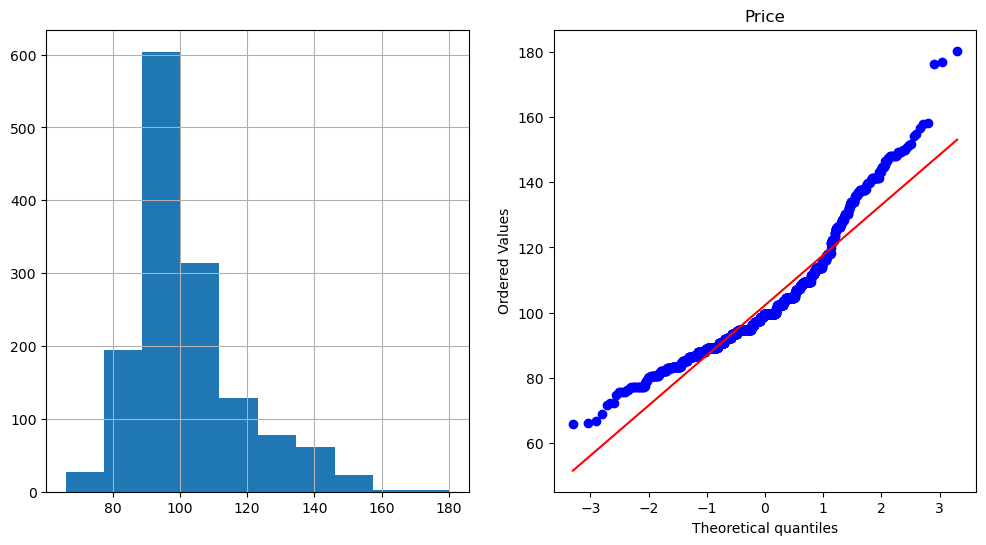

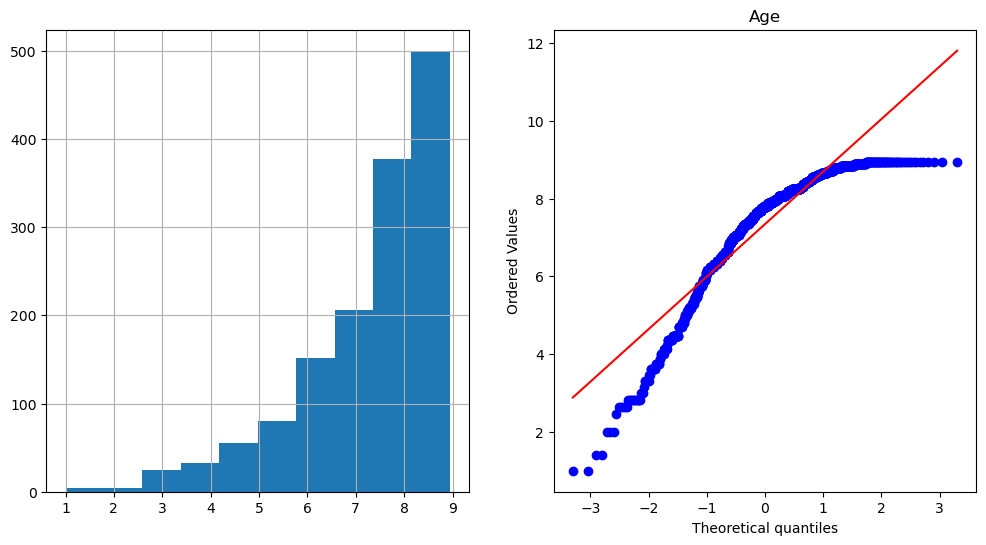

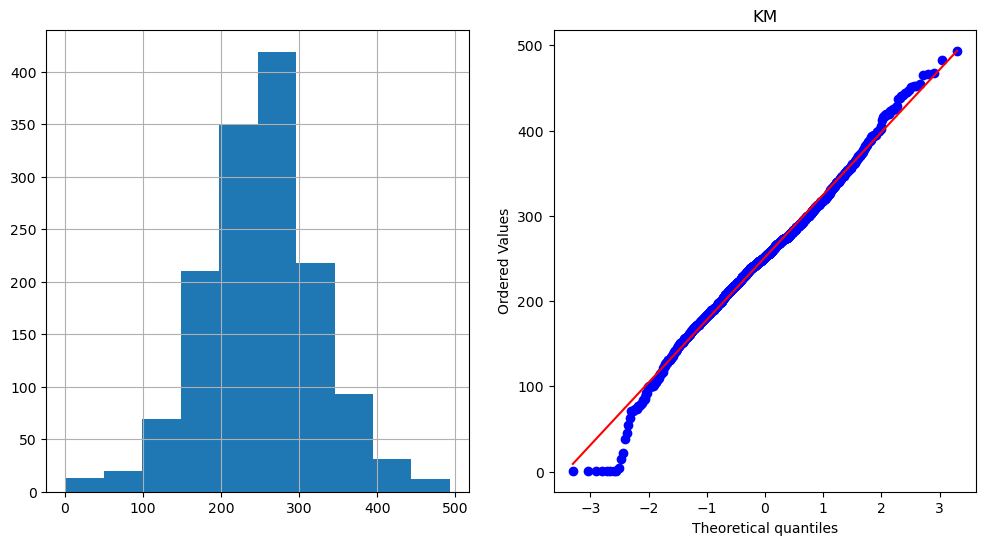

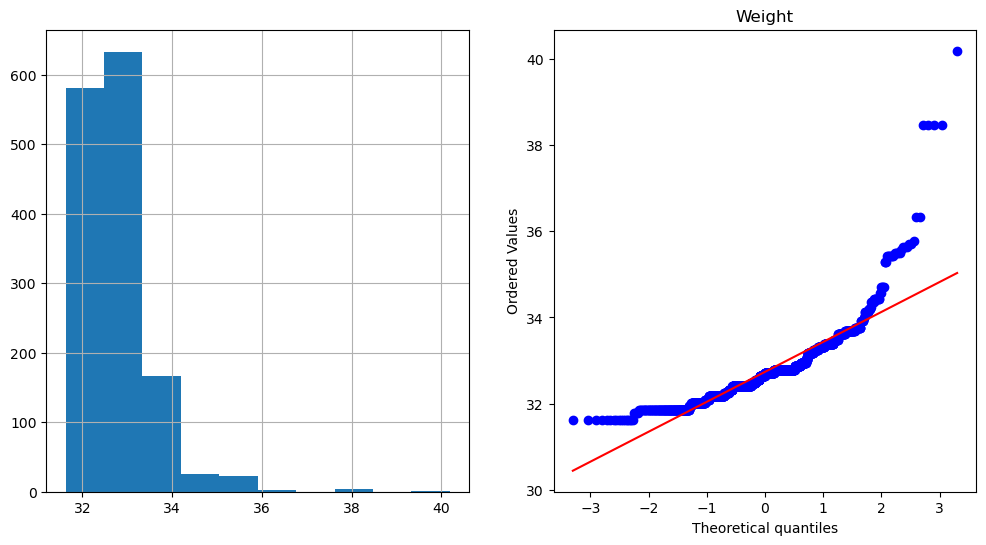

In [17]:
plot_data(dof,'Price')
plt.title('Price')
plot_data(dof,'Age_08_04')
plt.title('Age')
plot_data(dof,'KM')
plt.title('KM')
plot_data(dof,'Weight')
plt.title('Weight')

In [19]:
#cuberoot transformation
dof=data.copy()
dof[continuous_feature]=np.cbrt(dof[continuous_feature])


Text(0.5, 1.0, 'Weight')

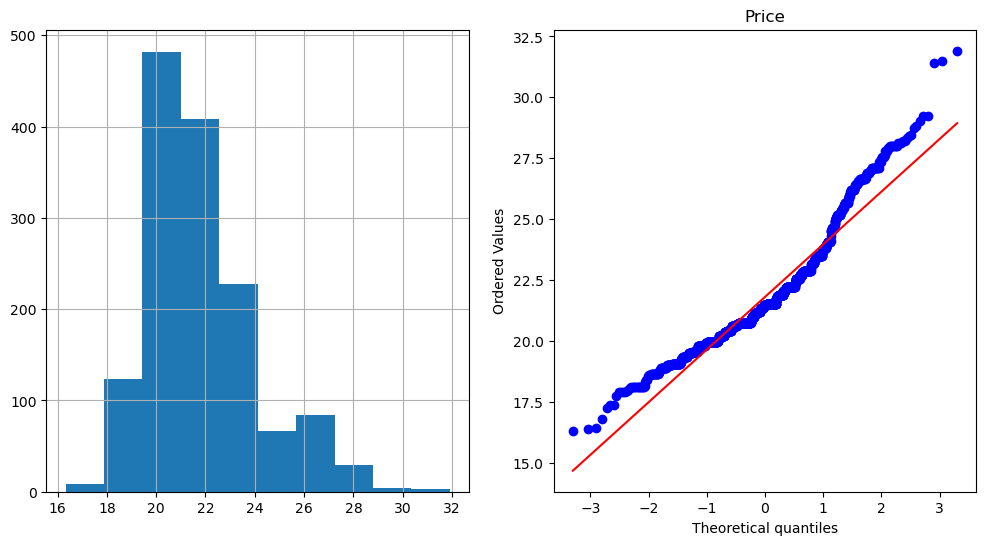

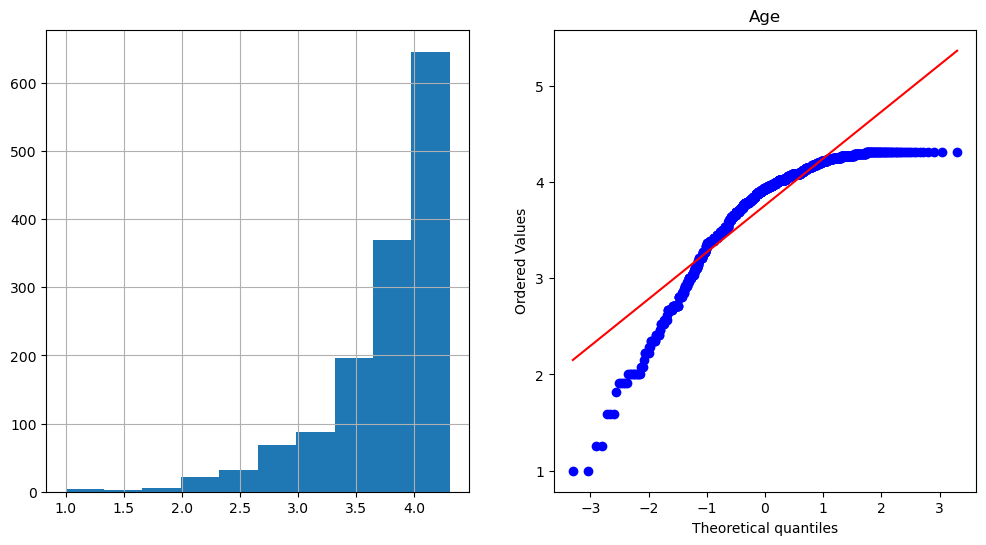

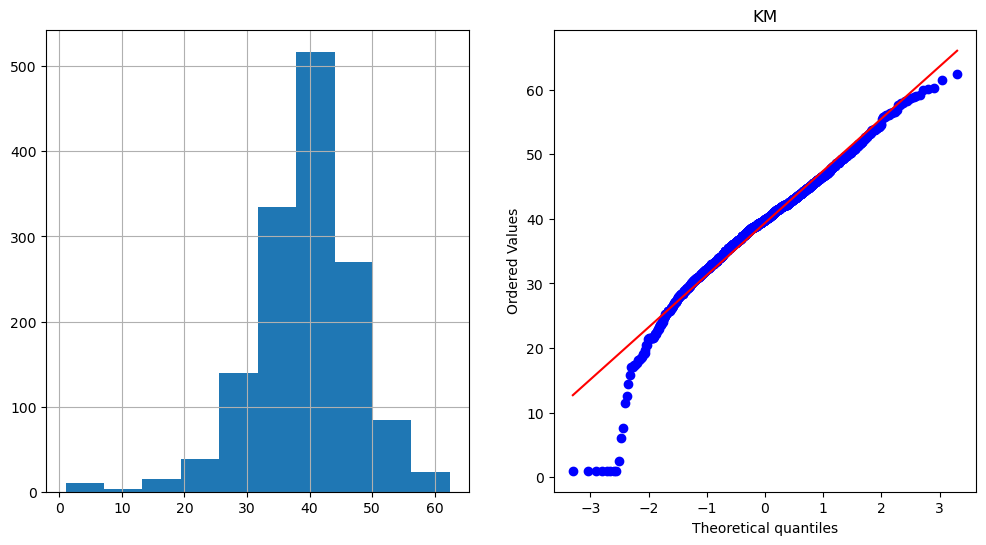

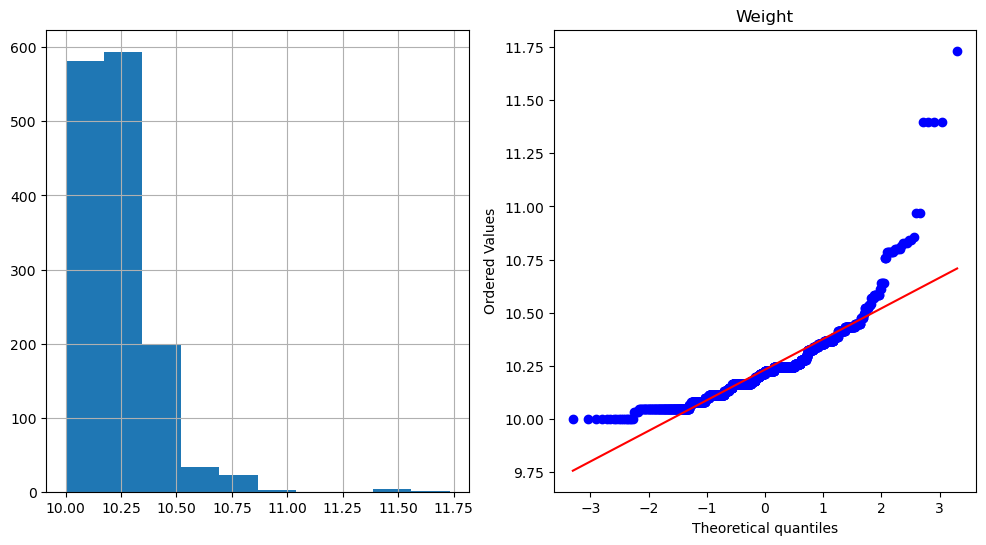

In [20]:
plot_data(dof,'Price')
plt.title('Price')
plot_data(dof,'Age_08_04')
plt.title('Age')
plot_data(dof,'KM')
plt.title('KM')
plot_data(dof,'Weight')
plt.title('Weight')

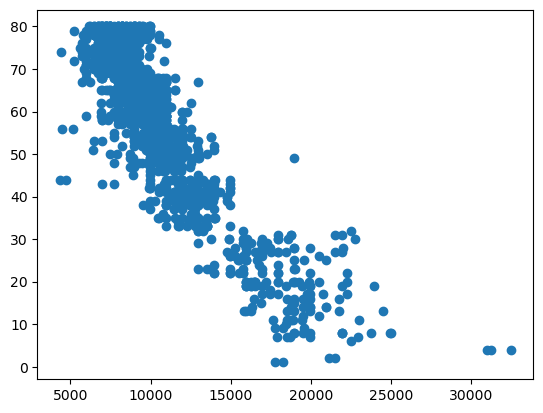

In [21]:
#relationship b/w each independent and dependent variables
#price  vs age
plt.scatter(data['Price'],data['Age_08_04'])
plt.show()

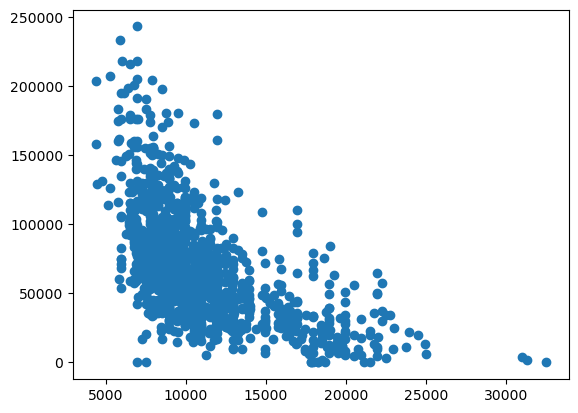

In [22]:
#price  vs  KM
plt.scatter(data['Price'],data['KM'])
plt.show()

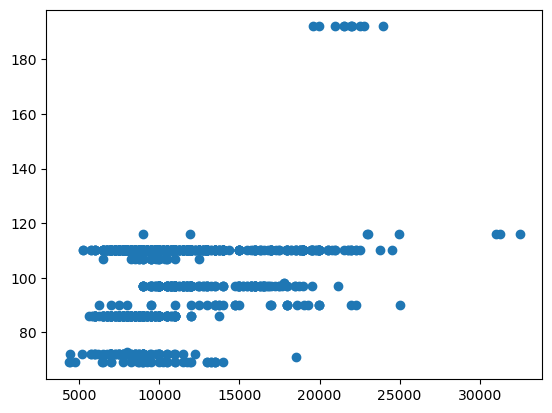

In [23]:
#price vs HP
plt.scatter(data['Price'],data['HP'])
plt.show()

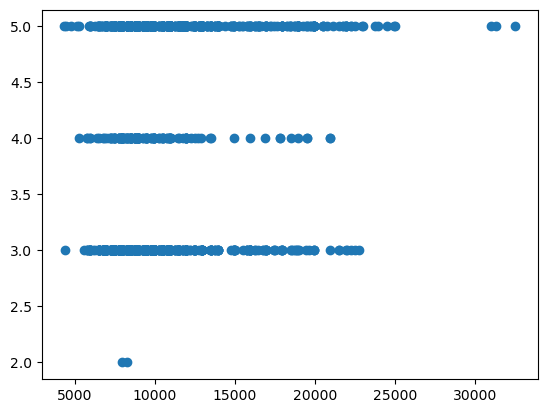

In [24]:
#price  vs  Doors
plt.scatter(data['Price'],data['Doors'])
plt.show()

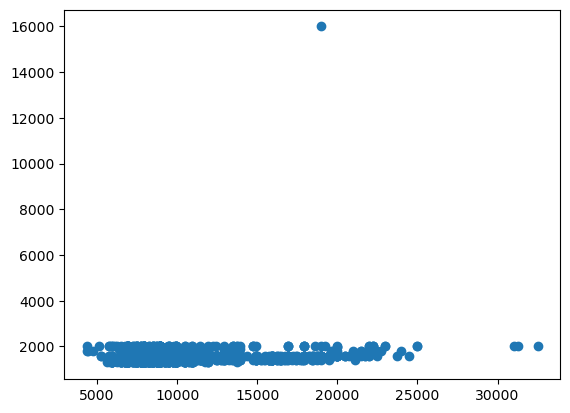

In [25]:
#price  vs  cc
plt.scatter(data['Price'],data['cc'])
plt.show()

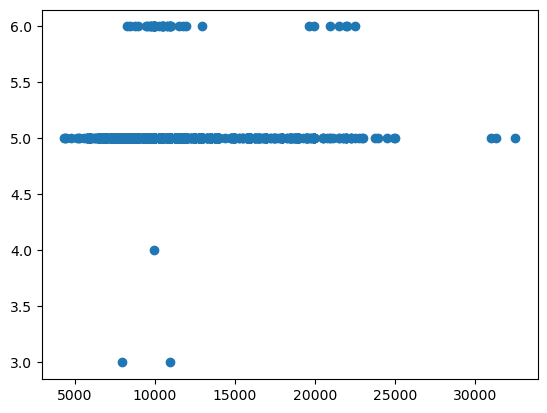

In [26]:
#price vs geras
plt.scatter(data['Price'],data['Gears'])
plt.show()

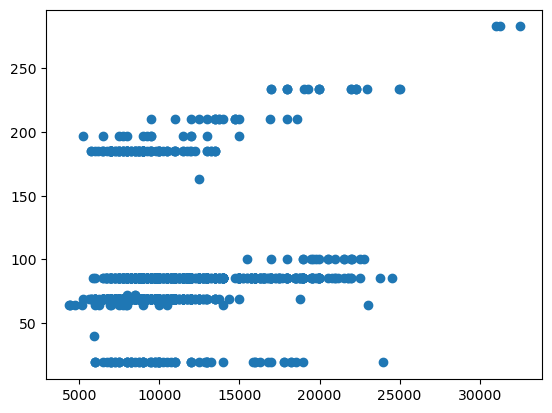

In [27]:
#price vs QT
plt.scatter(data['Price'],data['Quarterly_Tax'])
plt.show()

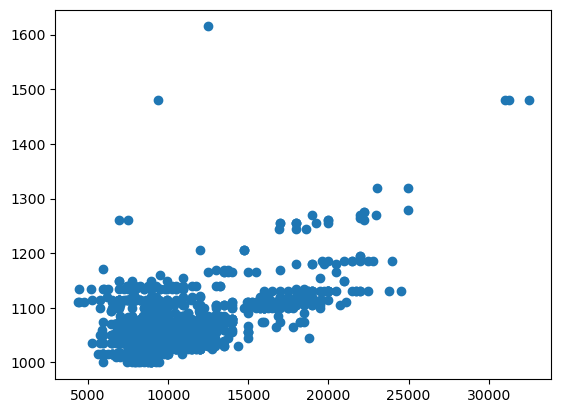

In [28]:
#price  vs  weight
plt.scatter(data['Price'],data['Weight'])
plt.show()

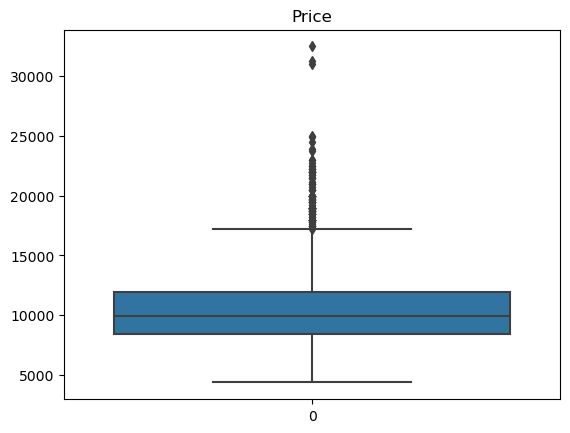

In [29]:
sns.boxplot(data['Price'])
plt.title('Price')
plt.show()

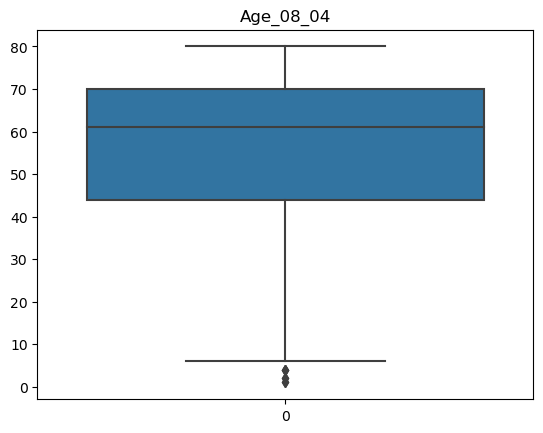

In [30]:
sns.boxplot(data['Age_08_04'])
plt.title('Age_08_04')
plt.show()


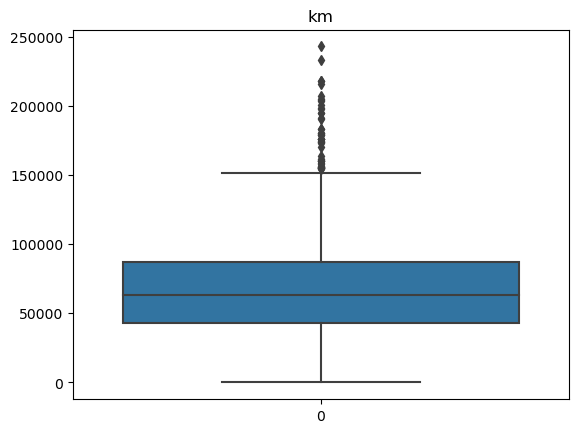

In [31]:
sns.boxplot(data['KM'])
plt.title('km')
plt.show()


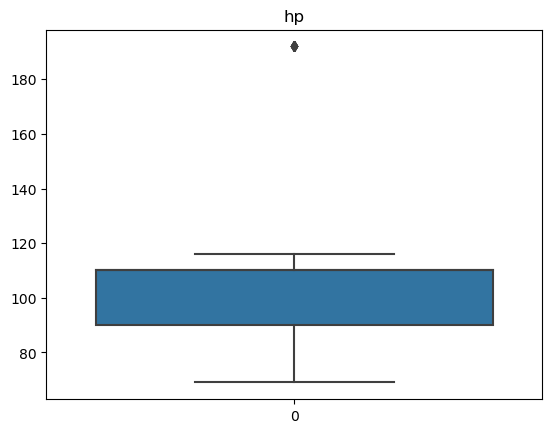

In [32]:
sns.boxplot(data['HP'])
plt.title('hp')
plt.show()

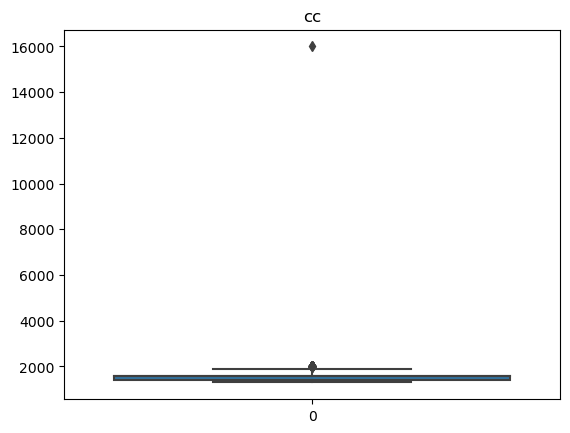

In [33]:
sns.boxplot(data['cc'])
plt.title('cc')
plt.show()

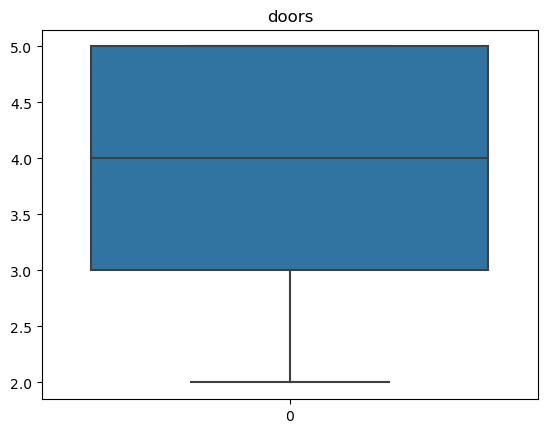

In [34]:
sns.boxplot(data['Doors'])
plt.title('doors')
plt.show()

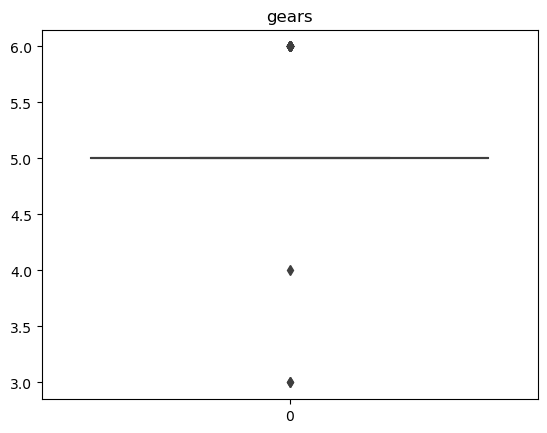

In [35]:
sns.boxplot(data['Gears'])
plt.title('gears')
plt.show()


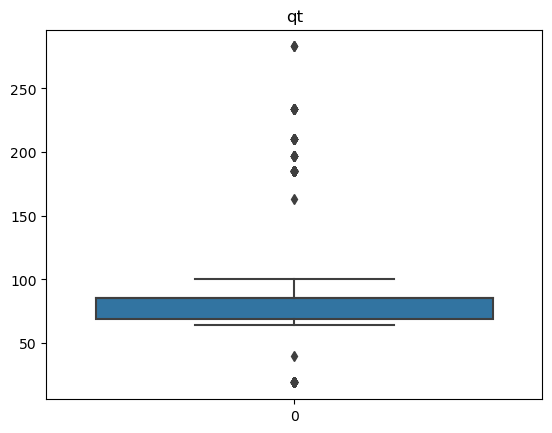

In [36]:
sns.boxplot(data['Quarterly_Tax'])
plt.title('qt')
plt.show()


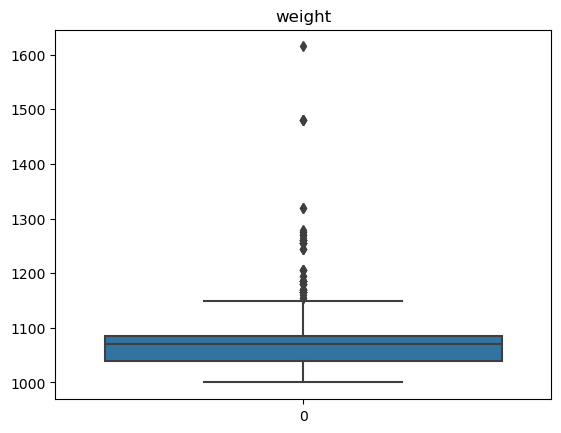

In [37]:
sns.boxplot(data['Weight'])
plt.title('weight')
plt.show()

In [38]:
data.HP.unique()


array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

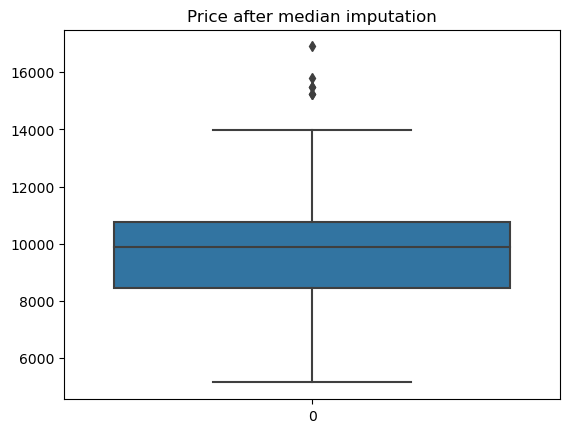

In [39]:
#median imputation
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

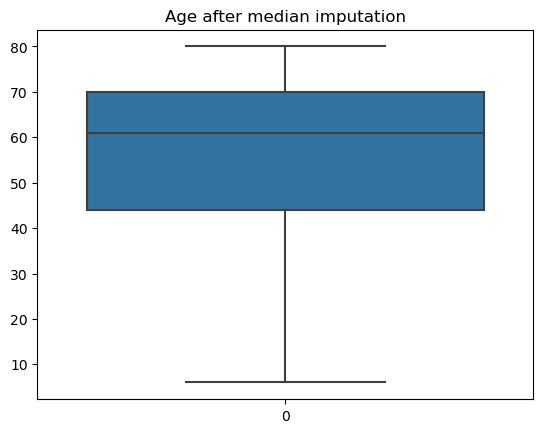

In [40]:
#median imputation
for i in data['Age_08_04']:
    q1 = np.quantile(df1.Age_08_04,0.25)
    q3 = np.quantile(df1.Age_08_04,0.75)
    med = np.median(df1.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age_08_04'] = df1['Age_08_04'].replace(i, np.median(df1['Age_08_04']))
sns.boxplot(df1['Age_08_04'])
plt.title('Age after median imputation')
plt.show()

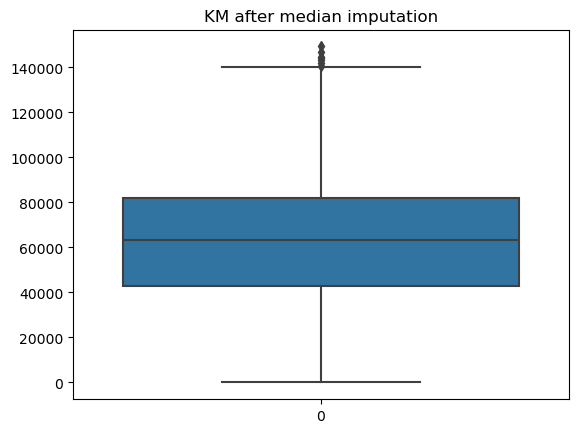

In [41]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

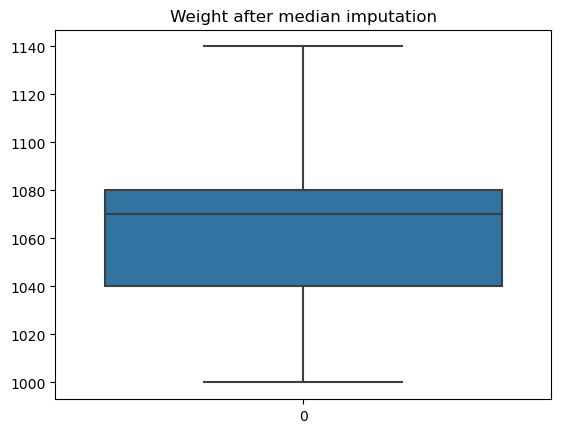

In [42]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

In [43]:
import statsmodels.formula.api as smf
after_median_imputation_model = smf.ols("Price~Age_08_04+KM+Weight", data = df1).fit()
after_median_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     248.0
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          1.46e-129
Time:                        20:10:21   Log-Likelihood:                -12482.
No. Observations:                1435   AIC:                         2.497e+04
Df Residuals:                    1431   BIC:                         2.499e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.499e+04   1424.366     10.521      0.000    1.22e+04    1.78e+04
Age_08_04    -53.8651      2.704    -19.923      0.000     -59.169     -48.561
KM            -0.0050      0.002     -3.266      0.001      -0.008      -0.002
Weight        -1.8571      1.292     -1.437      0.151      -4.392       0.678
==============================================================================
Omnibus:                       15.066   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.793
Skew:                           0.224   Prob(JB):                     0.000613
Kurtosis:                       2.782   Cond. No.                     2.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

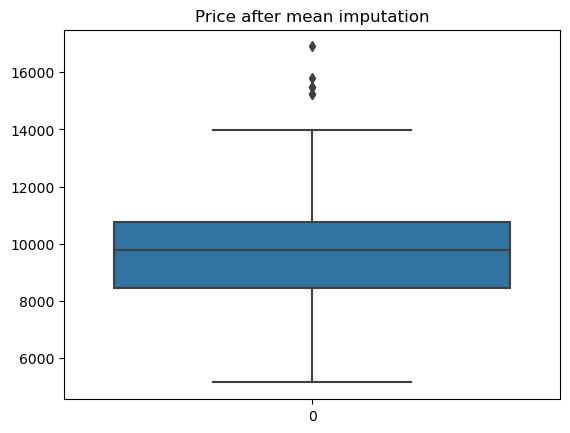

In [44]:
#mean imputation
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()


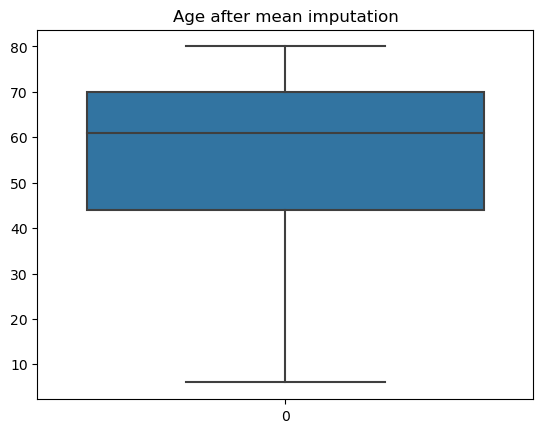

In [45]:
for i in data['Age_08_04']:
    q1 = np.quantile(df2.Age_08_04,0.25)
    q3 = np.quantile(df2.Age_08_04,0.75)
    med = np.median(df2.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age_08_04'] = df2['Age_08_04'].replace(i, np.mean(df2['Age_08_04']))
sns.boxplot(df2['Age_08_04'])
plt.title('Age after mean imputation')
plt.show()


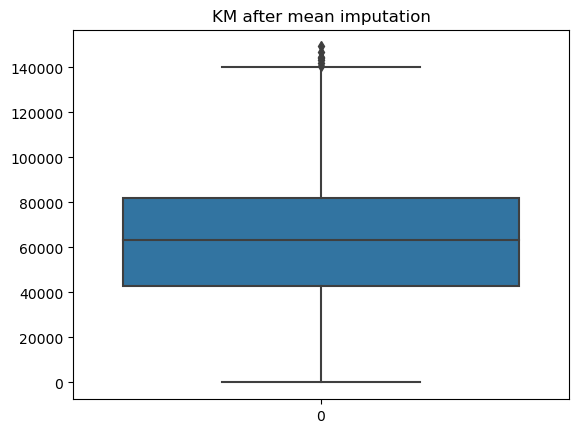

In [46]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()


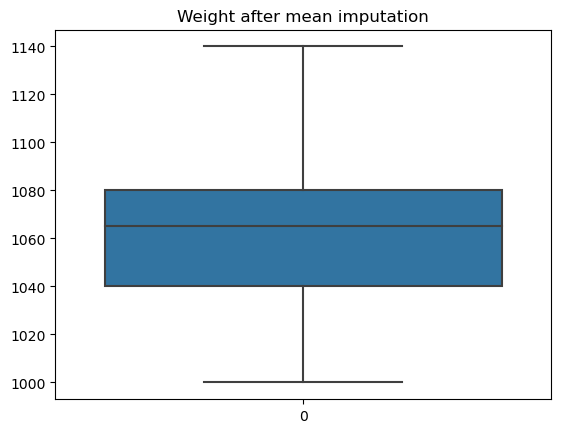

In [47]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()


In [48]:
import statsmodels.formula.api as smf
after_mean_imputation_model = smf.ols("Price~Age_08_04+KM+Weight", data = df2).fit()
after_mean_imputation_model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     302.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          5.18e-152
Time:                        20:12:01   Log-Likelihood:                -12440.
No. Observations:                1435   AIC:                         2.489e+04
Df Residuals:                    1431   BIC:                         2.491e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04   1385.095     10.475      0.000    1.18e+04    1.72e+04
Age_08_04    -57.1231      2.638    -21.654      0.000     -62.298     -51.948
KM            -0.0055      0.001     -3.681      0.000      -0.008      -0.003
Weight        -1.1706      1.257     -0.931      0.352      -3.636       1.295
==============================================================================
Omnibus:                        8.486   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.593
Skew:                           0.181   Prob(JB):                       0.0136
Kurtosis:                       2.887   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Price after removing outliers')

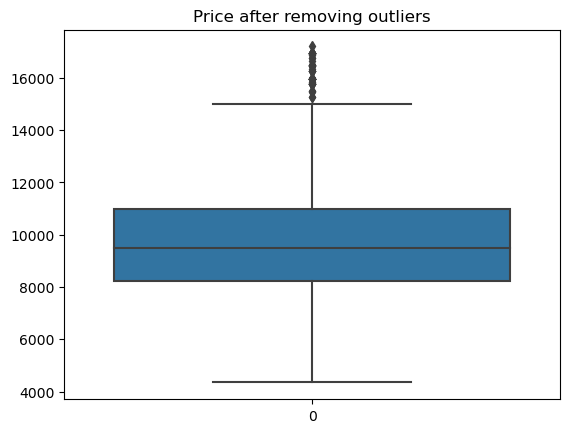

In [49]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')


Text(0.5, 1.0, 'Age after removing outliers')

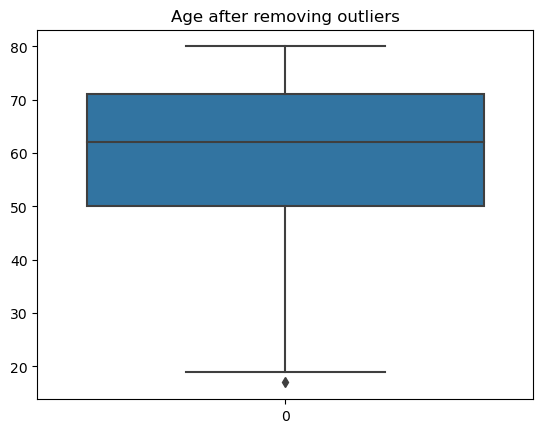

In [50]:
drop_outliers(df3, 'Age_08_04')
sns.boxplot(df3.Age_08_04)
plt.title('Age after removing outliers')


Text(0.5, 1.0, 'KM after removing outliers')

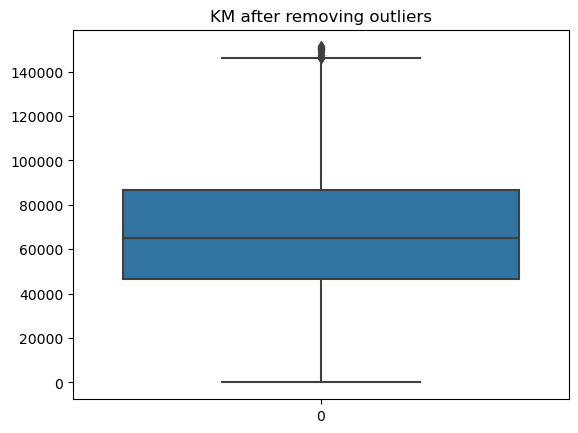

In [51]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')


In [54]:
removed_outlier_model = smf.ols("Price~Age_08_04+KM+Weight", data = df3).fit()
removed_outlier_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1432.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:14:22   Log-Likelihood:                -10328.
No. Observations:                1232   AIC:                         2.066e+04
Df Residuals:                    1228   BIC:                         2.069e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2763.7964   1194.789      2.313      0.021     419.742    5107.851
Age_08_04   -105.1891      2.449    -42.947      0.000    -109.994    -100.384
KM            -0.0182      0.001    -15.174      0.000      -0.021      -0.016
Weight        13.8720      1.092     12.700      0.000      11.729      16.015
==============================================================================
Omnibus:                       95.503   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.278
Skew:                          -0.405   Prob(JB):                     3.03e-57
Kurtosis:                       5.101   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
raw_data_model = smf.ols("Price~Age_08_04+KM+Weight+HP+cc+Gears+Quarterly_Tax+Doors", data = data).fit()
raw_data_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:14:37   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
dataframe=data.copy()
df_log_scaled = pd.DataFrame()
df_log_scaled['Age_08_04'] = np.log(dataframe.Age_08_04)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['cc']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

,Age_08_04,Price,KM,Weight,CC,Doors,HP
0,3.135494,9.510445,10.757605,7.060476,2000,3,90
1,3.135494,9.528794,11.197351,7.060476,2000,3,90
2,3.178054,9.543235,10.638520,7.060476,2000,3,90
3,3.258097,9.612467,10.778956,7.060476,2000,3,90
4,3.401197,9.528794,10.558414,7.064759,2000,3,90


In [57]:
log_transformed_model = smf.ols("Price~Age_08_04+KM+HP+CC+Doors+Weight", data = df_log_scaled).fit()
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     699.7
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:15:08   Log-Likelihood:                 698.06
No. Observations:                1435   AIC:                            -1382.
Df Residuals:                    1428   BIC:                            -1345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7907      0.787      7.359      0.000       4.247       7.334
Age_08_04     -0.4579      0.012    -39.429      0.000      -0.481      -0.435
KM             0.0172      0.005      3.527      0.000       0.008       0.027
HP             0.0039      0.000     14.647      0.000       0.003       0.004
CC         -6.449e-06   9.96e-06     -0.647      0.517    -2.6e-05    1.31e-05
Doors          0.0063      0.004      1.443      0.149      -0.002       0.015
Weight         0.6654      0.112      5.933      0.000       0.445       0.885
==============================================================================
Omnibus:                      423.490   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2263.347
Skew:                          -1.273   Prob(JB):                         0.00
Kurtosis:                       8.601   Cond. No.                     3.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age_08_04'] = np.cbrt(dataframe.Age_08_04)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['cc'] = dataframe['cc']
df_cbrt_scaled['Quarterly_Tax'] = dataframe['Quarterly_Tax']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

,Age_08_04,Price,KM,Weight,cc,Quarterly_Tax,Doors,Gears,HP
0,2.843867,23.811016,36.084677,10.522251,2000,210,3,5,90
1,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
2,2.884499,24.072696,34.680355,10.522251,2000,210,3,5,90
3,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
4,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90


In [59]:
cbrt_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_cbrt_scaled).fit()
cbrt_transformed_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     943.1
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:15:44   Log-Likelihood:                -1868.6
No. Observations:                1435   AIC:                             3755.
Df Residuals:                    1426   BIC:                             3803.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.4148      2.535      6.080      0.000      10.441      20.388
Age_08_04        -2.8467      0.069    -41.107      0.000      -2.983      -2.711
KM               -0.0486      0.004    -11.705      0.000      -0.057      -0.040
HP                0.0251      0.002     13.528      0.000       0.021       0.029
cc            -3.835e-05      6e-05     -0.639      0.523      -0.000    7.93e-05
Doors             0.0606      0.027      2.265      0.024       0.008       0.113
Gears             0.4806      0.131      3.669      0.000       0.224       0.737
Quarterly_Tax     0.0046      0.001      5.261      0.000       0.003       0.006
Weight            1.3154      0.244      5.380      0.000       0.836       1.795
==============================================================================
Omnibus:                      226.808   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.475
Skew:                          -0.725   Prob(JB):                    9.52e-190
Kurtosis:                       6.529   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age_08_04'] = np.sqrt(dataframe.Age_08_04)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['cc'] = dataframe['cc']
df_sqrt_scaled['Quarterly_Tax'] = dataframe['Quarterly_Tax']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

,Age_08_04,Price,KM,Weight,cc,Quarterly_Tax,Doors,Gears,HP
0,4.795832,116.189500,216.762543,34.132096,2000,210,3,5,90
1,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
2,4.898979,118.110118,204.232710,34.132096,2000,210,3,5,90
3,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
4,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90


In [61]:
sqrt_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_sqrt_scaled).fit()
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1135.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:16:28   Log-Likelihood:                -4585.0
No. Observations:                1435   AIC:                             9188.
Df Residuals:                    1426   BIC:                             9235.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        44.4187     11.220      3.959      0.000      22.408      66.429
Age_08_04        -7.3593      0.163    -45.131      0.000      -7.679      -7.039
KM               -0.0451      0.003    -15.027      0.000      -0.051      -0.039
HP                0.1640      0.012     13.270      0.000       0.140       0.188
cc               -0.0003      0.000     -0.708      0.479      -0.001       0.000
Doors             0.3377      0.177      1.904      0.057      -0.010       0.686
Gears             3.4002      0.870      3.910      0.000       1.694       5.106
Quarterly_Tax     0.0311      0.006      5.329      0.000       0.020       0.043
Weight            2.6232      0.331      7.917      0.000       1.973       3.273
==============================================================================
Omnibus:                      129.192   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.857
Skew:                          -0.417   Prob(JB):                     7.50e-94
Kurtosis:                       5.545   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from sklearn.preprocessing import StandardScaler


In [63]:
col_names = dataframe.columns
features = dataframe[col_names]

In [64]:
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688


In [65]:
standard_scaler_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_standard_scaled).fit()
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:17:26   Log-Likelihood:                -612.46
No. Observations:                1435   AIC:                             1243.
Df Residuals:                    1426   BIC:                             1290.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.091e-15      0.010  -1.11e-13      1.000      -0.019       0.019
Age_08_04        -0.6261      0.013    -46.552      0.000      -0.652      -0.600
KM               -0.2154      0.013    -16.552      0.000      -0.241      -0.190
HP                0.1311      0.012     11.210      0.000       0.108       0.154
cc               -0.0139      0.011     -1.316      0.188      -0.035       0.007
Doors            -0.0002      0.011     -0.023      0.982      -0.021       0.020
Gears             0.0312      0.010      3.035      0.002       0.011       0.051
Quarterly_Tax     0.0438      0.015      2.944      0.003       0.015       0.073
Weight            0.2441      0.015     15.761      0.000       0.214       0.274
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model_names=['after_median_imputation_model','after_mean_imputation_model','removed_outlier_model','raw_data_model','log_transformed_model','cbrt_transformed_model','sqrt_transformed_model','standard_scaler_transformed_model']
r_squared_values=[0.342,0.388,0.778,0.863,0.746,0.841,0.864,0.863]
data={"Model":model_names,"R-Squared":r_squared_values}


In [67]:
r_squares=pd.DataFrame(data)
print(r_squares)


                               Model  R-Squared
0      after_median_imputation_model      0.342
1        after_mean_imputation_model      0.388
2              removed_outlier_model      0.778
3                     raw_data_model      0.863
4              log_transformed_model      0.746
5             cbrt_transformed_model      0.841
6             sqrt_transformed_model      0.864
7  standard_scaler_transformed_model      0.863
